This jupyter-notebook has be created with 'jupytext'.

Use this [Link](https://colab.research.google.com/github/magnumnp/magnumnp_demos/blob/main/sp_domainwall_pinning.ipynb) to directly open the Notebook in Google Colab.

## Install magnum.np and fetch reference data (required for Colab)

In [1]:
!pip install -q triton magnumnp
from os import path
if not path.isdir("ref"):
    !mkdir ref
    !wget -P ref https://gitlab.com/magnum.np/magnum.np/raw/main/demos/sp_domainwall_pinning/ref/m.dat &> /dev/null

# Domainwall Pinning Standard Problem

## Run Simulation

In [2]:
from magnumnp import *
import numpy as np
import pathlib
from tqdm import tqdm

set_log_level(25) # show info_green, but hide info_blue
Timer.enable()
try:
    this_dir = pathlib.Path(__file__).resolve().parent
except:
    this_dir = pathlib.Path().resolve()

Hextmax=1.8/constants.mu_0
Hextmin=1.4/constants.mu_0
tfinal = 20e-9

n  = (80, 1, 1)
dx = (1e-9, 1e-9, 1e-9)
origin = (-n[0]*dx[0]/2., -n[1]*dx[1]/2., -n[2]*dx[2]/2.,)
mesh = Mesh(n, dx, origin)
state = State(mesh)
state.material = {"alpha": state.Constant(1.)}
x, y, z = mesh.SpatialCoordinate()

soft = (x < 0)
hard = (x >= 0)

Ms = state.Constant(0.0)
Ms[soft] = 0.25/constants.mu_0
Ms[hard] = 1./constants.mu_0

Ku = state.Constant(0.0)
Ku[soft] = 1e5
Ku[hard] = 1e6

A = state.Constant(0.0)
A[soft] = 0.25e-11
A[hard] = 1.e-11

state.material['Ms'] = Ms
state.material['A'] = A
state.material['Ku'] = Ku
state.material['Ku_axis'] = state.Constant([0,1,0])

state.m = state.Constant([np.sin(0.3), np.cos(0.3), 0.0])
state.m[hard] = torch.tensor([0.0, -1.0, 0.0])
normalize(state.m)

exchange = ExchangeField()
aniso    = UniaxialAnisotropyField()
external = ExternalField(state.Constant([0, 0, 0]))

minimizer = MinimizerBB([exchange, aniso, external])
logger = ScalarLogger(this_dir / "data" / "m.dat", ['t', external.h, 'm'])
for h in tqdm(torch.linspace(Hextmin, Hextmax, steps=100)):
    external.h = state.Constant([0, h, 0])
    minimizer.minimize(state)
    logger << state

Timer.print_report()

2026-02-13 11:19:31  magnum.np:INFO magnum.np 2.2.0 (/usr/local/lib/python3.10/site-packages/ipykernel_launcher.py -f /tmp/tmpwbrwz2w7.json --HistoryManager.hist_file=:memory:)


2026-02-13 11:19:31  magnum.np:INFO [State] running on device: cpu (dtype = float64)


2026-02-13 11:19:31  magnum.np:INFO [Mesh] 80x1x1 (dx= 1e-09 x 1e-09 x 1e-09)


  0%|          | 0/100 [00:00<?, ?it/s]

2026-02-13 11:19:39  magnum.np:INFO [MinimizerBB] Successfully converged (iter=103, dm_tol = 1)


  1%|          | 1/100 [00:07<12:50,  7.79s/it]

2026-02-13 11:19:39  magnum.np:INFO [MinimizerBB] Successfully converged (iter=56, dm_tol = 1)


2026-02-13 11:19:39  magnum.np:INFO [MinimizerBB] Successfully converged (iter=59, dm_tol = 1)


2026-02-13 11:19:39  magnum.np:INFO [MinimizerBB] Successfully converged (iter=55, dm_tol = 1)


  4%|▍         | 4/100 [00:07<02:25,  1.51s/it]

2026-02-13 11:19:39  magnum.np:INFO [MinimizerBB] Successfully converged (iter=54, dm_tol = 1)


2026-02-13 11:19:39  magnum.np:INFO [MinimizerBB] Successfully converged (iter=53, dm_tol = 1)


2026-02-13 11:19:39  magnum.np:INFO [MinimizerBB] Successfully converged (iter=57, dm_tol = 1)


  7%|▋         | 7/100 [00:08<01:07,  1.38it/s]

2026-02-13 11:19:39  magnum.np:INFO [MinimizerBB] Successfully converged (iter=63, dm_tol = 1)


2026-02-13 11:19:39  magnum.np:INFO [MinimizerBB] Successfully converged (iter=62, dm_tol = 1)


  9%|▉         | 9/100 [00:08<00:45,  2.01it/s]

2026-02-13 11:19:39  magnum.np:INFO [MinimizerBB] Successfully converged (iter=87, dm_tol = 1)


2026-02-13 11:19:39  magnum.np:INFO [MinimizerBB] Successfully converged (iter=64, dm_tol = 1)


 11%|█         | 11/100 [00:08<00:31,  2.83it/s]

2026-02-13 11:19:40  magnum.np:INFO [MinimizerBB] Successfully converged (iter=61, dm_tol = 1)


2026-02-13 11:19:40  magnum.np:INFO [MinimizerBB] Successfully converged (iter=52, dm_tol = 1)


2026-02-13 11:19:40  magnum.np:INFO [MinimizerBB] Successfully converged (iter=55, dm_tol = 1)


 14%|█▍        | 14/100 [00:08<00:19,  4.41it/s]

2026-02-13 11:19:40  magnum.np:INFO [MinimizerBB] Successfully converged (iter=71, dm_tol = 1)


2026-02-13 11:19:40  magnum.np:INFO [MinimizerBB] Successfully converged (iter=51, dm_tol = 1)


2026-02-13 11:19:40  magnum.np:INFO [MinimizerBB] Successfully converged (iter=55, dm_tol = 1)


 17%|█▋        | 17/100 [00:08<00:13,  6.22it/s]

2026-02-13 11:19:40  magnum.np:INFO [MinimizerBB] Successfully converged (iter=63, dm_tol = 1)


2026-02-13 11:19:40  magnum.np:INFO [MinimizerBB] Successfully converged (iter=63, dm_tol = 1)


 19%|█▉        | 19/100 [00:08<00:10,  7.55it/s]

2026-02-13 11:19:40  magnum.np:INFO [MinimizerBB] Successfully converged (iter=61, dm_tol = 1)


2026-02-13 11:19:40  magnum.np:INFO [MinimizerBB] Successfully converged (iter=57, dm_tol = 1)


2026-02-13 11:19:40  magnum.np:INFO [MinimizerBB] Successfully converged (iter=85, dm_tol = 1)


 22%|██▏       | 22/100 [00:08<00:08,  9.52it/s]

2026-02-13 11:19:40  magnum.np:INFO [MinimizerBB] Successfully converged (iter=51, dm_tol = 1)


2026-02-13 11:19:40  magnum.np:INFO [MinimizerBB] Successfully converged (iter=72, dm_tol = 1)


 24%|██▍       | 24/100 [00:08<00:06, 10.91it/s]

2026-02-13 11:19:40  magnum.np:INFO [MinimizerBB] Successfully converged (iter=76, dm_tol = 1)


2026-02-13 11:19:40  magnum.np:INFO [MinimizerBB] Successfully converged (iter=71, dm_tol = 1)


 26%|██▌       | 26/100 [00:09<00:06, 12.04it/s]

2026-02-13 11:19:40  magnum.np:INFO [MinimizerBB] Successfully converged (iter=72, dm_tol = 1)


2026-02-13 11:19:40  magnum.np:INFO [MinimizerBB] Successfully converged (iter=83, dm_tol = 1)


 28%|██▊       | 28/100 [00:09<00:05, 12.96it/s]

2026-02-13 11:19:40  magnum.np:INFO [MinimizerBB] Successfully converged (iter=87, dm_tol = 1)


2026-02-13 11:19:41  magnum.np:INFO [MinimizerBB] Successfully converged (iter=114, dm_tol = 1)


 30%|███       | 30/100 [00:09<00:05, 12.88it/s]

2026-02-13 11:19:41  magnum.np:INFO [MinimizerBB] Successfully converged (iter=79, dm_tol = 1)


2026-02-13 11:19:41  magnum.np:INFO [MinimizerBB] Successfully converged (iter=114, dm_tol = 1)


 32%|███▏      | 32/100 [00:09<00:05, 12.93it/s]

2026-02-13 11:19:41  magnum.np:INFO [MinimizerBB] Successfully converged (iter=88, dm_tol = 1)


2026-02-13 11:19:41  magnum.np:INFO [MinimizerBB] Successfully converged (iter=97, dm_tol = 1)


 34%|███▍      | 34/100 [00:09<00:05, 13.13it/s]

2026-02-13 11:19:41  magnum.np:INFO [MinimizerBB] Successfully converged (iter=96, dm_tol = 1)


2026-02-13 11:19:41  magnum.np:INFO [MinimizerBB] Successfully converged (iter=103, dm_tol = 1)


 36%|███▌      | 36/100 [00:09<00:04, 13.07it/s]

2026-02-13 11:19:41  magnum.np:INFO [MinimizerBB] Successfully converged (iter=89, dm_tol = 1)


2026-02-13 11:19:41  magnum.np:INFO [MinimizerBB] Successfully converged (iter=100, dm_tol = 1)


 38%|███▊      | 38/100 [00:09<00:04, 13.16it/s]

2026-02-13 11:19:41  magnum.np:INFO [MinimizerBB] Successfully converged (iter=132, dm_tol = 1)


2026-02-13 11:19:41  magnum.np:INFO [MinimizerBB] Successfully converged (iter=118, dm_tol = 1)


 40%|████      | 40/100 [00:10<00:04, 12.19it/s]

2026-02-13 11:19:41  magnum.np:INFO [MinimizerBB] Successfully converged (iter=88, dm_tol = 1)


2026-02-13 11:19:41  magnum.np:INFO [MinimizerBB] Successfully converged (iter=108, dm_tol = 1)


 42%|████▏     | 42/100 [00:10<00:04, 12.48it/s]

2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=154, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=269, dm_tol = 1)


 44%|████▍     | 44/100 [00:10<00:05,  9.64it/s]

2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=306, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


 46%|████▌     | 46/100 [00:10<00:05,  9.30it/s]

2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


 71%|███████   | 71/100 [00:10<00:00, 49.15it/s]

2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


 96%|█████████▌| 96/100 [00:11<00:00, 87.47it/s]

2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


2026-02-13 11:19:42  magnum.np:INFO [MinimizerBB] Successfully converged (iter=0, dm_tol = 1)


100%|██████████| 100/100 [00:11<00:00,  9.04it/s]


2026-02-13 11:19:42  magnum.np: ===============================================================================


2026-02-13 11:19:42  magnum.np: TIMER REPORT


2026-02-13 11:19:42  magnum.np: ===============================================================================


2026-02-13 11:19:42  magnum.np: Operation                        No of calls    Avg time [ms]    Total time [s]


2026-02-13 11:19:42  magnum.np: -----------------------------  -------------  ---------------  ----------------


2026-02-13 11:19:42  magnum.np: MinimizerBB.minimize                     100      108.066           10.8066


2026-02-13 11:19:42  magnum.np:     ExchangeField.h                     4154        1.65406          6.87097


2026-02-13 11:19:42  magnum.np:     UniaxialAnisotropyField.h           4154        0.369772         1.53603


2026-02-13 11:19:42  magnum.np:     ExternalField.h                     4154        0.0118553        0.0492467


2026-02-13 11:19:42  magnum.np: ExternalField.h                          100        0.0173461        0.00173461


2026-02-13 11:19:42  magnum.np: -----------------------------  -------------  ---------------  ----------------


2026-02-13 11:19:42  magnum.np: Total                                                               11.0691


2026-02-13 11:19:42  magnum.np: Missing                                                              0.2608


2026-02-13 11:19:42  magnum.np: ===============================================================================


## Plot Results

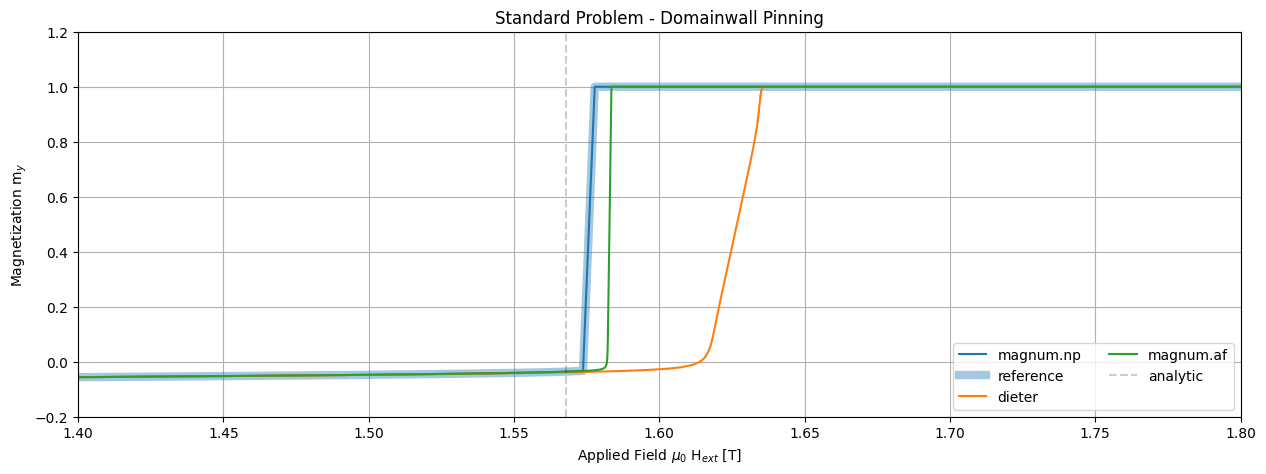

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("data/m.dat")
ref = np.loadtxt("ref/m_ref.dat")
data_dieter = np.loadtxt("ref/m_dieter.dat")
data_magnumaf = np.loadtxt("ref/m_magnumaf.dat")


fig, ax = plt.subplots(figsize=(15,5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot(data[:,2]*4*np.pi*1e-7, data[:,5], '-', color = cycle[0], label = "magnum.np")
ax.plot(ref[:,2]*4*np.pi*1e-7, ref[:,5], '-', color = cycle[0], linewidth = 6, alpha = 0.4, label = "reference")
ax.plot(data_dieter[:,1], data_dieter[:,3], '-', color = cycle[1], label = "dieter")
ax.plot(data_magnumaf[:,4]*4*np.pi*1e-7, data_magnumaf[:,2], '-', color = cycle[2], label = "magnum.af")
ax.axvline(x = 1.568, linestyle = '--', color = 'black', alpha = 0.2, label = 'analytic')

ax.set_xlim([1.4,1.8])
ax.set_ylim([-0.2,1.2])
ax.set_title("Standard Problem - Domainwall Pinning")
ax.set_xlabel("Applied Field $\mu$$_0$ H$_{ext}$ [T]")
ax.set_ylabel("Magnetization m$_y$")
ax.legend(ncol=2, loc='lower right')
ax.grid()
fig.savefig("data/results.png")